In [1]:
# Importing necessary libraries

# Numerical and matrix operations
import numpy as np  # NumPy is used for numerical computations and handling arrays.
import pandas as pd  # Pandas is used for data manipulation and analysis, particularly for dataframes.

# Data visualization
from matplotlib import pyplot as plt  # Matplotlib is used for creating static, interactive, and animated visualizations.
import seaborn as sns  # Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.
from datetime import datetime

#Statistical modeling and machine learning
from sklearn.model_selection import train_test_split  # Scikit-learn is used for splitting data into training and testing sets.
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Scikit-learn is used for feature scaling.
from sklearn.linear_model import LinearRegression  # Scikit-learn is used for linear regression modeling.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Scikit-learn is used for evaluating the performance of models.
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import joblib

# Deep learning
import tensorflow as tf  # TensorFlow is used for deep learning and neural networks.
from tensorflow import keras  # Keras, which comes bundled


In [2]:
#retrieving the csv file
data = pd.read_csv('card_data.csv')

In [3]:
#Data Frame
df = pd.DataFrame(data)

In [4]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount Withdrawn,Class,Date,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,F,2024-06-07,0 days 11:00:44
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,F,2024-06-07,0 days 11:01:43
2,NaN,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,NaN,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,F,2024-06-07,0 days 11:02:05
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,F,2024-06-07,0 days 11:02:21
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,F,2024-06-07,0 days 11:03:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,-0.010578,0.138778,...,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,1.98,M,2024-07-10,0 days 11:21:44
505,-0.409900,1.183088,1.598967,0.353088,0.309710,-0.312400,0.707197,-0.043206,-0.892869,-0.684800,...,-0.069498,0.069735,-0.298407,0.199188,0.099692,0.118617,1.98,M,2024-07-10,0 days 11:22:21
506,1.240600,0.747735,-0.214136,1.301475,0.124740,-1.172183,0.371059,-0.306401,-0.246672,-0.597784,...,-0.132261,0.306805,0.728251,-0.331239,0.039024,0.053600,1.00,F,2024-07-10,0 days 11:24:01
507,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,-0.602646,...,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,F,2024-07-10,0 days 11:24:45


In [5]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount Withdrawn
count,505.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,505.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,-0.147504,0.190540,0.863139,0.373890,0.026603,0.244175,0.104562,-0.044754,-0.013303,0.059720,...,0.047686,-0.007733,-0.108614,-0.031656,0.009900,0.131261,0.008315,0.019217,-0.018080,88.269037
std,1.361457,1.232291,1.040525,1.245675,1.186909,1.297989,0.856110,0.819954,0.861278,0.955978,...,0.614876,0.560787,0.617631,0.379144,0.640129,0.425208,0.465133,0.329490,0.293336,490.379065
min,-6.093248,-12.114213,-5.694973,-4.515824,-6.631951,-3.498447,-4.925568,-7.494658,-2.517037,-2.311024,...,-2.538941,-4.134608,-2.776923,-3.553381,-1.867208,-1.389079,-1.243924,-2.377933,-2.733887,0.000000
25%,-0.895224,-0.169044,0.302488,-0.363736,-0.568699,-0.584580,-0.303337,-0.159596,-0.478856,-0.366167,...,-0.165241,-0.224926,-0.534738,-0.163747,-0.384842,-0.136578,-0.315949,-0.041732,-0.013592,5.990000
50%,-0.342871,0.269139,0.878730,0.510525,-0.092210,-0.027353,0.103677,0.053143,-0.053466,-0.081320,...,-0.033831,-0.071473,-0.069830,-0.045124,0.104744,0.155102,-0.051634,0.021491,0.022966,17.800000
75%,1.114009,0.865268,1.513242,1.159432,0.480561,0.528598,0.554393,0.276524,0.392478,0.267392,...,0.146140,0.093118,0.313610,0.084311,0.431806,0.444578,0.226700,0.106580,0.085802,59.990000
max,1.586093,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,5.436633,8.737458,...,7.744222,4.332858,1.461535,3.150413,1.215279,1.136720,3.065576,2.490503,1.575380,10000.000000


In [6]:
########################################################################

In [7]:
#CLEANING THE DATA

In [8]:
#checking for duplicate rows
duplicates = data.duplicated(keep=False)
data[duplicates]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount Withdrawn,Class,Date,Time
499,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,-0.010578,0.138778,...,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,1.98,M,2024-07-10,0 days 11:21:44
500,-0.409900,1.183088,1.598967,0.353088,0.309710,-0.312400,0.707197,-0.043206,-0.892869,-0.684800,...,-0.069498,0.069735,-0.298407,0.199188,0.099692,0.118617,1.98,M,2024-07-10,0 days 11:22:21
501,1.240600,0.747735,-0.214136,1.301475,0.124740,-1.172183,0.371059,-0.306401,-0.246672,-0.597784,...,-0.132261,0.306805,0.728251,-0.331239,0.039024,0.053600,1.00,F,2024-07-10,0 days 11:24:01
502,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,-0.602646,...,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,F,2024-07-10,0 days 11:24:45
503,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,-0.260028,...,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,F,2024-07-10,0 days 11:31:21
504,1.239173,0.103368,0.371711,0.440033,-0.370396,-0.509393,-0.129165,0.030558,-0.010578,0.138778,...,0.097823,-0.034851,0.190347,0.101428,-0.041183,0.002979,1.98,M,2024-07-10,0 days 11:21:44
505,-0.409900,1.183088,1.598967,0.353088,0.309710,-0.312400,0.707197,-0.043206,-0.892869,-0.684800,...,-0.069498,0.069735,-0.298407,0.199188,0.099692,0.118617,1.98,M,2024-07-10,0 days 11:22:21
506,1.240600,0.747735,-0.214136,1.301475,0.124740,-1.172183,0.371059,-0.306401,-0.246672,-0.597784,...,-0.132261,0.306805,0.728251,-0.331239,0.039024,0.053600,1.00,F,2024-07-10,0 days 11:24:01
507,0.953918,-0.760595,1.091611,0.147115,-0.729796,1.430148,-1.070470,0.727965,1.432734,-0.602646,...,0.248461,-0.596979,-0.291046,1.053935,0.021906,0.003337,32.63,F,2024-07-10,0 days 11:24:45
508,1.255729,0.297650,0.287526,0.699902,-0.438405,-1.088542,0.034421,-0.159596,0.149990,-0.260028,...,0.137806,0.318641,0.190562,0.097319,-0.028174,0.029141,1.98,F,2024-07-10,0 days 11:31:21


In [9]:
#removing duplicate values while keeping the occurrence
data = data.drop_duplicates()
#To remove all duplicates including the first, we use this. but that shall make us loose data
#data_cleaned = data[~data.duplicated(keep=False)]


In [10]:
#
#confirming that there are no duplicate rows
duplicates = data.duplicated(keep=False)
data[duplicates]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount Withdrawn,Class,Date,Time


In [11]:
# checking for missing values 
data.isnull().sum()

V1                  4
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 4
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Amount Withdrawn    0
Class               0
Date                0
Time                0
dtype: int64

In [12]:

# Calculate the number of missing values per column
missing_values = data.isnull().sum()

# Calculate the total number of values per column
total_values = data.shape[0]

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_values) * 100

# Display the percentage of missing values
print("Percentage of missing data for each feature:")
print(missing_percentage)


Percentage of missing data for each feature:
V1                  0.793651
V2                  0.000000
V3                  0.000000
V4                  0.000000
V5                  0.000000
V6                  0.000000
V7                  0.000000
V8                  0.000000
V9                  0.000000
V10                 0.793651
V11                 0.000000
V12                 0.000000
V13                 0.000000
V14                 0.000000
V15                 0.000000
V16                 0.000000
V17                 0.000000
V18                 0.000000
V19                 0.000000
V20                 0.000000
V21                 0.000000
V22                 0.000000
V23                 0.000000
V24                 0.000000
V25                 0.000000
V26                 0.000000
V27                 0.000000
V28                 0.000000
Amount Withdrawn    0.000000
Class               0.000000
Date                0.000000
Time                0.000000
dtype: float64


In [13]:
#Filling the missing values in column V1 and V10 with their respective mean values

data = data.copy() #creating a copy of the object referencing to original object
data.loc[:, 'V1'] = data['V1'].fillna(data['V1'].mean())
data.loc[:, 'V10'] = data['V10'].fillna(data['V10'].mean())
#we used data.loc[:, 'col'] to explicitly select a column and modify it
#which avoids problems brought about by chained assignments (unexpected behavior)

In [14]:
# Verifying if missing values are handled
missing_values_after = data.isnull().sum()
print(missing_values_after)

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Amount Withdrawn    0
Class               0
Date                0
Time                0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   V1                505 non-null    float64
 1   V2                509 non-null    float64
 2   V3                509 non-null    float64
 3   V4                509 non-null    float64
 4   V5                509 non-null    float64
 5   V6                509 non-null    float64
 6   V7                509 non-null    float64
 7   V8                509 non-null    float64
 8   V9                509 non-null    float64
 9   V10               505 non-null    float64
 10  V11               509 non-null    float64
 11  V12               509 non-null    float64
 12  V13               509 non-null    float64
 13  V14               509 non-null    float64
 14  V15               509 non-null    float64
 15  V16               509 non-null    float64
 16  V17               509 non-null    float64
 1

In [16]:
# # Function to standardize date format
# import re
# def standardize_date(date_str):
#     # Match and reformat dates of format 'DDMMYYYY HH:MM:SS'
#     match = re.match(r'(\d{2})(\d{2})(\d{4}) (\d{2}):(\d{2}):(\d{2})', date_str)
#     if match:
#         return f'{match.group(1)}/{match.group(2)}/{match.group(3)} {match.group(4)}:{match.group(5)}:{match.group(6)}'
#     return date_str

# # Apply the function to standardize the 'Date Time' column
# df['Date Time'] = df['Date Time'].apply(standardize_date)


In [17]:


# # Convert 'Date Time' column to datetime
# df['Date Time'] = pd.to_datetime(df['Date Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# # Handle NaT values by interpolation
# df['Date Time'] = df['Date Time'].interpolate()
# # # Save the resulting DataFrame to a CSV file
# # df.to_csv("card_data.csv", index=False)


In [18]:
df.dtypes

V1                  float64
V2                  float64
V3                  float64
V4                  float64
V5                  float64
V6                  float64
V7                  float64
V8                  float64
V9                  float64
V10                 float64
V11                 float64
V12                 float64
V13                 float64
V14                 float64
V15                 float64
V16                 float64
V17                 float64
V18                 float64
V19                 float64
V20                 float64
V21                 float64
V22                 float64
V23                 float64
V24                 float64
V25                 float64
V26                 float64
V27                 float64
V28                 float64
Amount Withdrawn    float64
Class                object
Date                 object
Time                 object
dtype: object

In [19]:

# # Splitting 'Date Time' into 'Date' and 'Time' columns
# df[['Date', 'Time']] = df['Date Time'].str.split(' ', expand=True)

# # Dropping the original 'Date Time' column
# df.drop(columns=['Date Time'], inplace=True)

# Converting 'Date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Converting 'Time' column to timedelta data type
df['Time'] = pd.to_timedelta(df['Time'])


# Save the updated DataFrame to a new CSV file
df.to_csv('card_data.csv', index=False)


# Display the updated DataFrame with correct data types
print(df.dtypes)

# Display the updated DataFrame
print(df)


V1                          float64
V2                          float64
V3                          float64
V4                          float64
V5                          float64
V6                          float64
V7                          float64
V8                          float64
V9                          float64
V10                         float64
V11                         float64
V12                         float64
V13                         float64
V14                         float64
V15                         float64
V16                         float64
V17                         float64
V18                         float64
V19                         float64
V20                         float64
V21                         float64
V22                         float64
V23                         float64
V24                         float64
V25                         float64
V26                         float64
V27                         float64
V28                         

In [20]:

# # Function to standardize datetime format
# def parse_date(date_str):
#     try:
#         return datetime.strptime(date_str, "%y/%m/%d %H:%M:%S")
#     except ValueError:
#         return datetime.strptime(date_str, "%y%m%d %H:%M:%S")

# # Apply the function to the Date Time column
# df["Date Time"] = df["Date Time"].apply(parse_date)

# # Extract date and time components
# df["Date"] = df["Date Time"].dt.date
# df["Time"] = df["Date Time"].dt.time

# # Drop the original Date Time column
# df.drop("Date Time", axis=1, inplace=True)


# # Save the resulting DataFrame to a CSV file
# df.to_csv("card_data.csv", index=False)


In [21]:
#####################################################################################################

In [22]:
#DATA VISUALIZATION

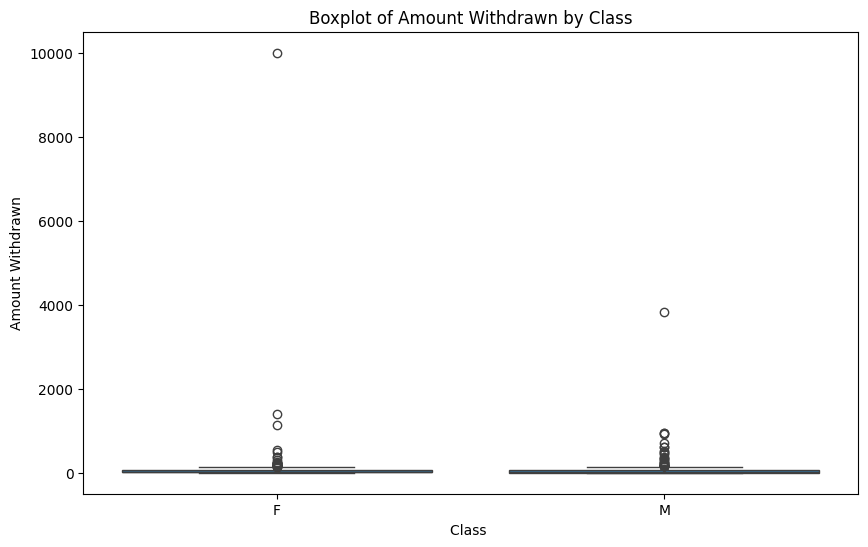

In [23]:
# Plotting the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class ', y='Amount Withdrawn')
plt.title('Boxplot of Amount Withdrawn by Class')
plt.show()

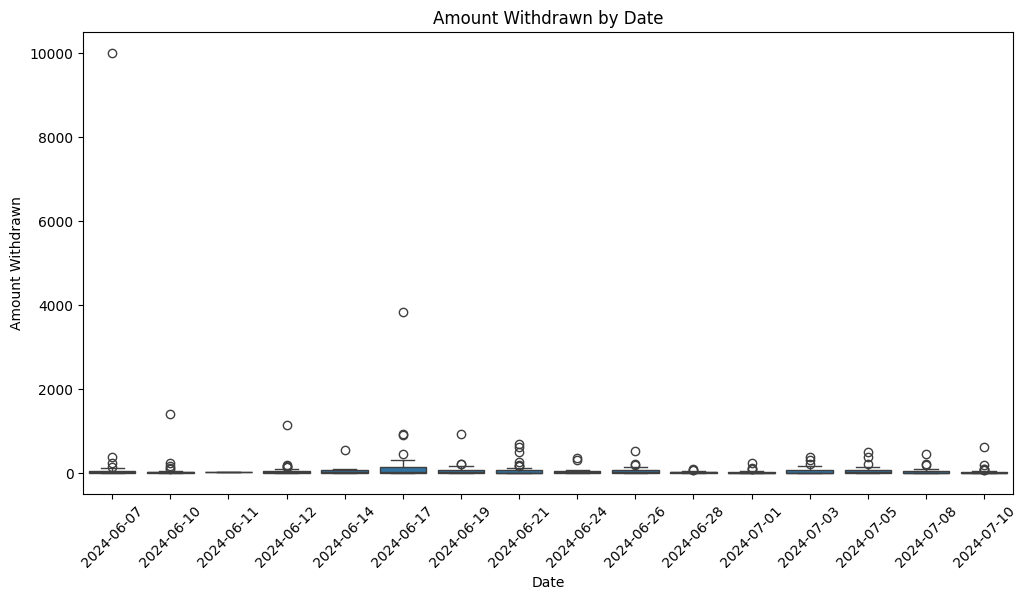

In [24]:

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Date', y='Amount Withdrawn', data=df)
plt.xticks(rotation=45)
plt.title('Amount Withdrawn by Date')
plt.show()

In [25]:
# Remove non-numeric columns
data = df.select_dtypes(include=[float, int])

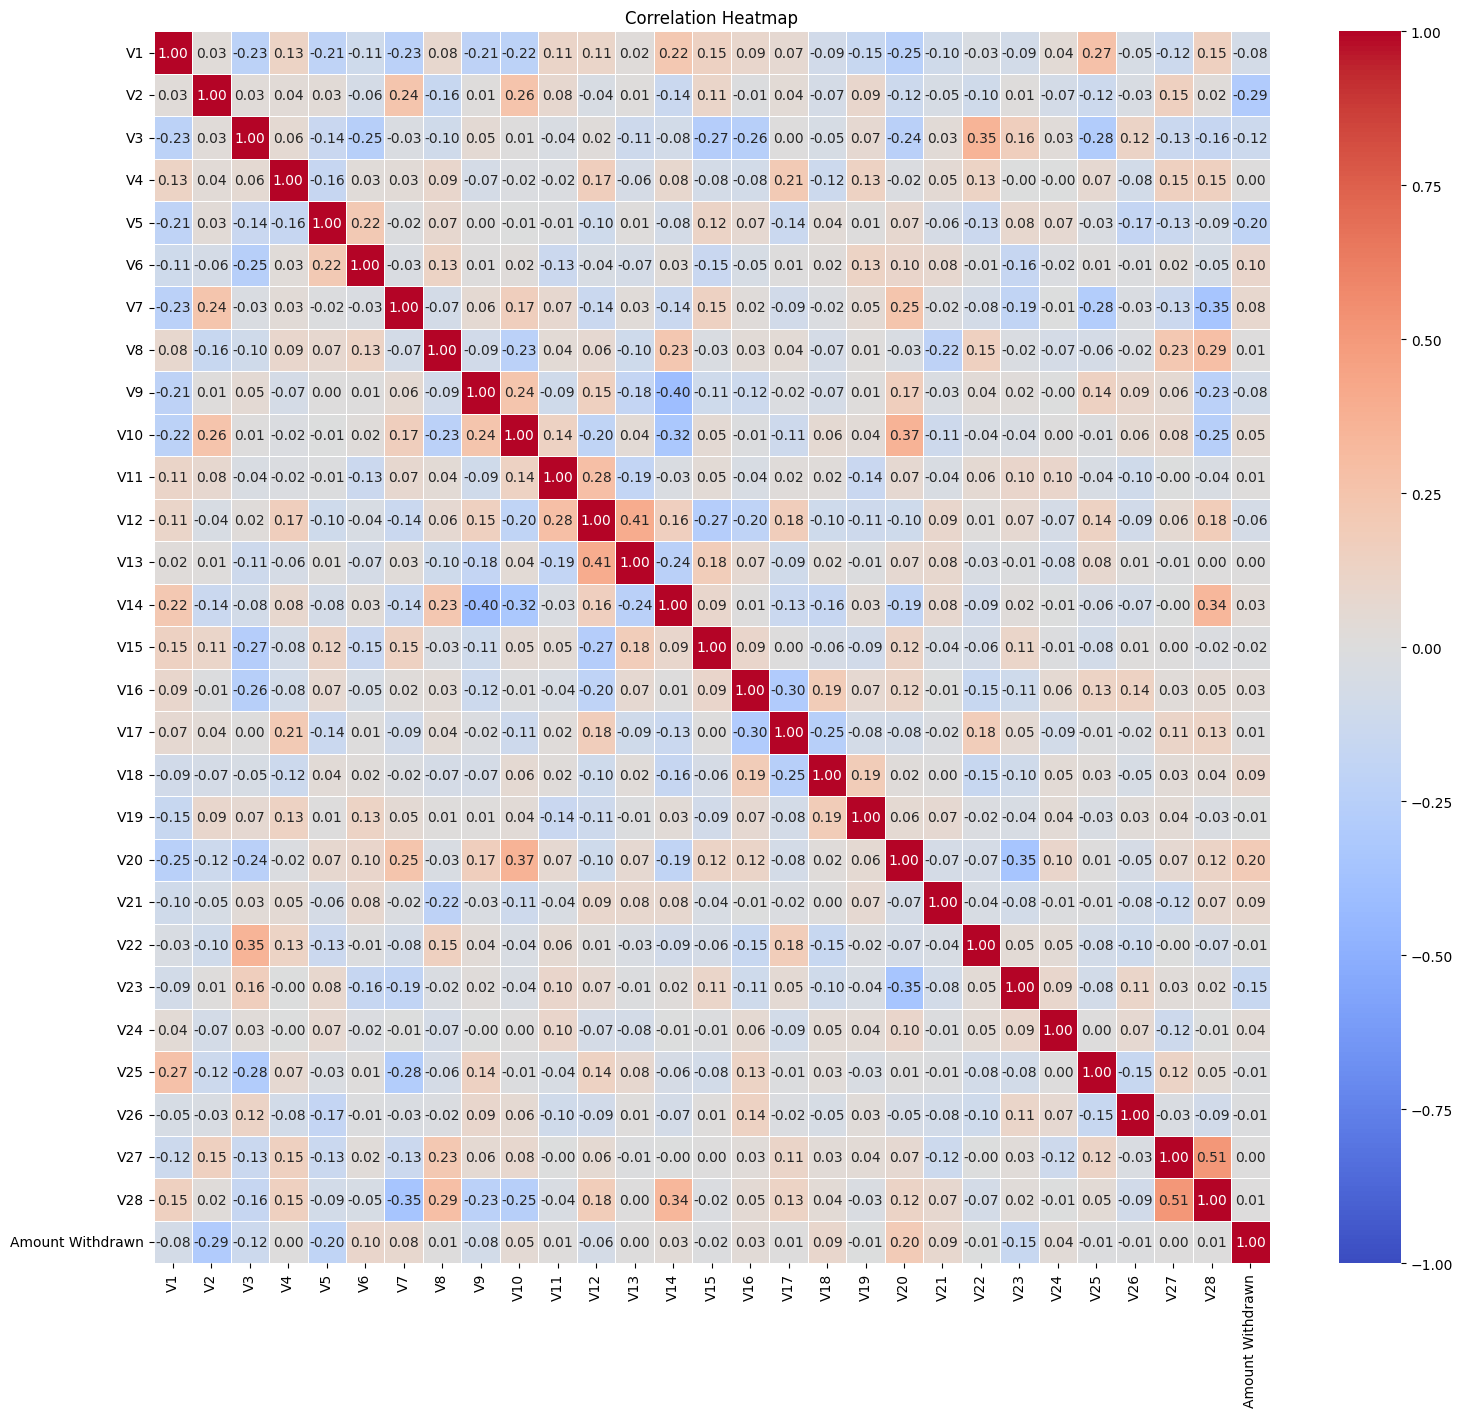

In [26]:
#correlation heatmap
plt.figure(figsize=(18,16))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',vmin=-1,vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
###################################################################################3

In [28]:
#MODEL

In [29]:
#LOGISTIC REGRESSION

In [42]:
data = pd.read_csv('card_data.csv')

In [43]:
df = pd.DataFrame(data)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount Withdrawn',
       'Class ', 'Date', 'Time'],
      dtype='object')

In [44]:
fraud = df.loc[df['Class '] == 'F']
normal = df.loc[df['Class '] == 'M']

In [45]:
len(fraud)

266

In [46]:
len(normal)

243

In [47]:
# #Filling the missing values in column V1 and V10 with their respective mean values

# dat = dat.copy() #creating a copy of the object referencing to original object
# dat.loc[:, 'V1'] = dat['V1'].fillna(dat['V1'].mean())
# dat.loc[:, 'V10'] = dat['V10'].fillna(dat['V10'].mean())
# #we used data.loc[:, 'col'] to explicitly select a column and modify it
# #which avoids problems brought about by chained assignments (unexpected behavior)

In [48]:
# Extract features and target
X = data.iloc[:, :-1]  # all columns except the last one
y = data['Class ']   # the last column

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.8)

In [50]:
clf = linear_model.LogisticRegression(C=1e5)

In [51]:
clf.fit(x_train, y_train)

ValueError: could not convert string to float: 'M'

In [102]:
y_pred = np.array(clf.predict(x_test))
y = np.array(y_test)

ValueError: could not convert string to float: 'M'

In [103]:
print(confusion_matrix(y, y_pred))

NameError: name 'y_pred' is not defined

In [104]:
print(accuracy_score(y, y_pred))

NameError: name 'y_pred' is not defined

In [105]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

#### 

In [43]:

#REGRESSION METRICS







In [53]:
# Convert categorical columns to numeric
df['Class '] = df['Class '].map({'F': 0, 'M': 1})

# Drop unnecessary columns (Date and Time)
df = df.drop(['Date', 'Time'], axis=1)

# Define features and target
X = df.drop('Class ', axis=1)
y = df['Class ']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [55]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


NameError: name 'LogisticRegression' is not defined